# SCRAPING

In [18]:
import requests
from bs4 import BeautifulSoup
import csv

# Nama file output
output_file = 'cybersecurity1_articles_springer.csv'

# Membuka file CSV untuk menyimpan data
with open(output_file, mode='w', newline='', encoding='utf-8') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(['Title', 'URL', 'Date Published', 'Authors', 'Abstract'])

    # Scrap untuk beberapa halaman
    for page_num in range(1, 6):  # Halaman 1 - 5
        print(f"Scraping page {page_num}...")

        # URL pencarian dengan parameter halaman
        search_url = f"https://link.springer.com/search?query=cyber+security&facet-content-type=Article&page={page_num}"

        # Header untuk simulasi permintaan dari browser
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }

        response = requests.get(search_url, headers=headers)

        # Mengecek respons
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Mendapatkan artikel dalam hasil pencarian
            results = soup.find_all('li', class_='app-card-open')

            for item in results:
                # Mengambil judul artikel
                title_element = item.find('a', class_='app-card-open__link')
                title = title_element.get_text(strip=True) if title_element else 'Title not found'

                # URL artikel
                article_url = f"https://link.springer.com{title_element['href']}" if title_element else 'URL not found'

                # Tanggal publikasi
                date_element = item.find('span', {'class': 'c-meta__item', 'data-test': 'published'})
                publication_date = date_element.get_text(strip=True) if date_element else 'Date not found'

                # Inisialisasi penulis dan abstrak
                author_list = []
                full_abstract = 'Abstract Not Available'

                # Mengambil data dari halaman detail artikel
                if article_url != 'URL Not Available':
                    detail_response = requests.get(article_url, headers=headers)
                    if detail_response.status_code == 200:
                        detail_soup = BeautifulSoup(detail_response.text, 'html.parser')

                        # Mengambil data penulis
                        author_elements = detail_soup.find_all('a', {'data-test': 'author-name'})
                        author_list = [author.get_text(strip=True) for author in author_elements]

                        # Mengambil abstrak
                        abstract_section = detail_soup.find('section', {'data-title': 'Abstract'})
                        if abstract_section:
                            abstract_paragraph = abstract_section.find('p')
                            full_abstract = abstract_paragraph.get_text(strip=True) if abstract_paragraph else full_abstract

                # Menyimpan data ke CSV
                csv_writer.writerow([title, article_url, publication_date, ', '.join(author_list), full_abstract])
        else:
            print(f"ggal membuka page {page_num}, status code: {response.status_code}")

print(f"data tersimpan '{output_file}'.")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
data tersimpan 'cybersecurity1_articles_springer.csv'.


#preprocessing

In [22]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load data
data_path = 'cybersecurity1_articles_springer.csv'
df = pd.read_csv(data_path)

# Memastikan kolom 'Abstract' ada dalam data
if 'Abstract' in df.columns:
    # Inisialisasi stop words dan lemmatizer
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Fungsi untuk mendapatkan tag kata yang sesuai untuk lemmatization
    def get_wordnet_pos(word):
        tag = pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # Fungsi preprocessing
    def preprocess_text(text):
        # Lowercase
        text = text.lower()

        # Hapus tanda tanda baca dan karakter yg non alfabet
        text = re.sub(r'[^a-z\s]', '', text)

        # Tokenisasi
        words = word_tokenize(text)

        # Hapus stop words dan melakukan lemmatization
        words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words if word not in stop_words]

        # Mengabungkan kembali kata2 yang sudah diproses
        return ' '.join(words)

    # Menempelkan preprocessing pada kolom 'Abstract'
    df['Preprocessed_Abstract'] = df['Abstract'].apply(preprocess_text)

    # Simpan hasilnya ke file baru
    output_file = 'cybersecurity1_articles_springer_preprocessed.csv'
    df.to_csv(output_file, index=False, encoding='utf-8')
    print(f"Data isimpan dalam {output_file}")
else:
    print("Kolom 'Abstract' tidak ditemukan dalam file CSV.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Data isimpan dalam cybersecurity1_articles_springer_preprocessed.csv


# ANALISIS dan INSIGHT

Index(['Title', 'URL', 'Date Published', 'Authors', 'Abstract',
       'Preprocessed_Abstract'],
      dtype='object')


<ipython-input-25-028bdab047f1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words_df, x='Frequency', y='Word', palette='viridis')


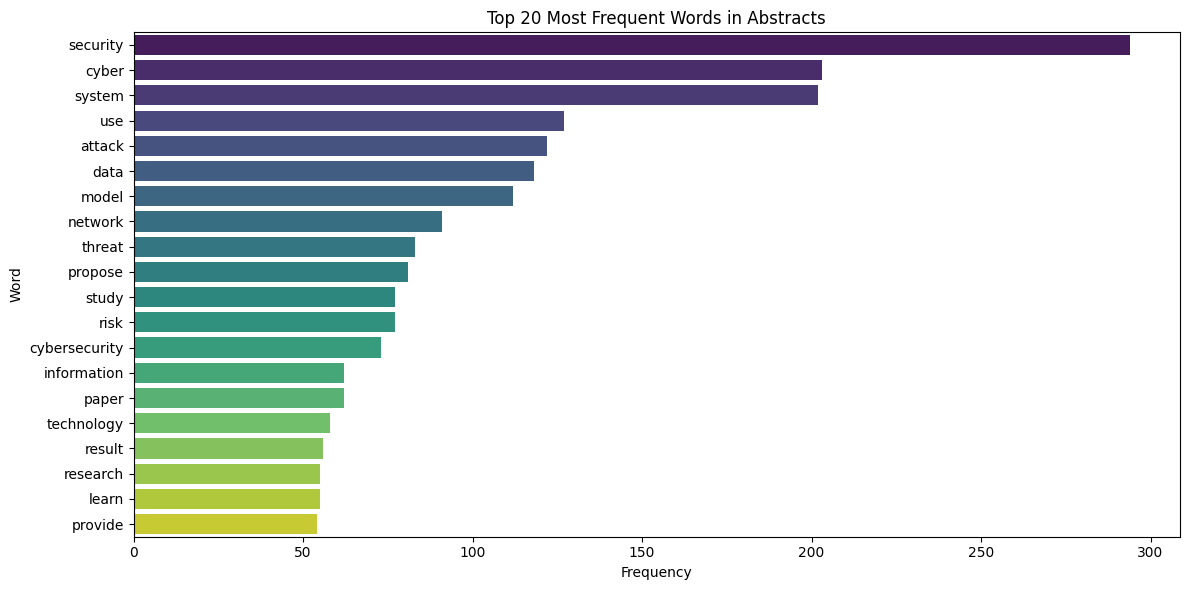

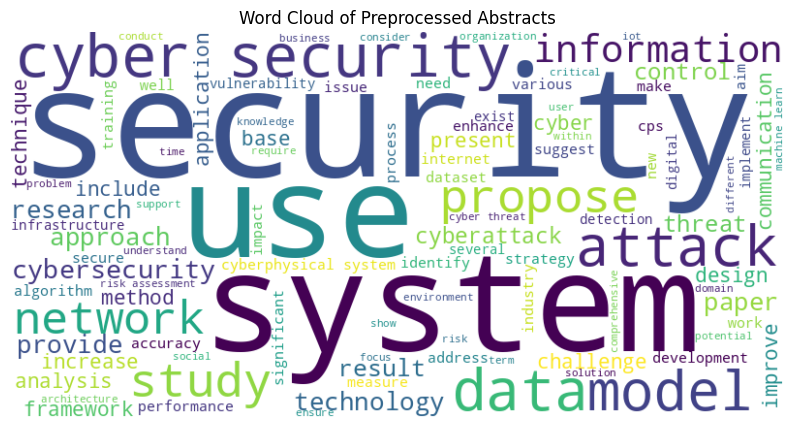

<ipython-input-25-028bdab047f1>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bigrams_df, x='Frequency', y='Bigram', palette='viridis')


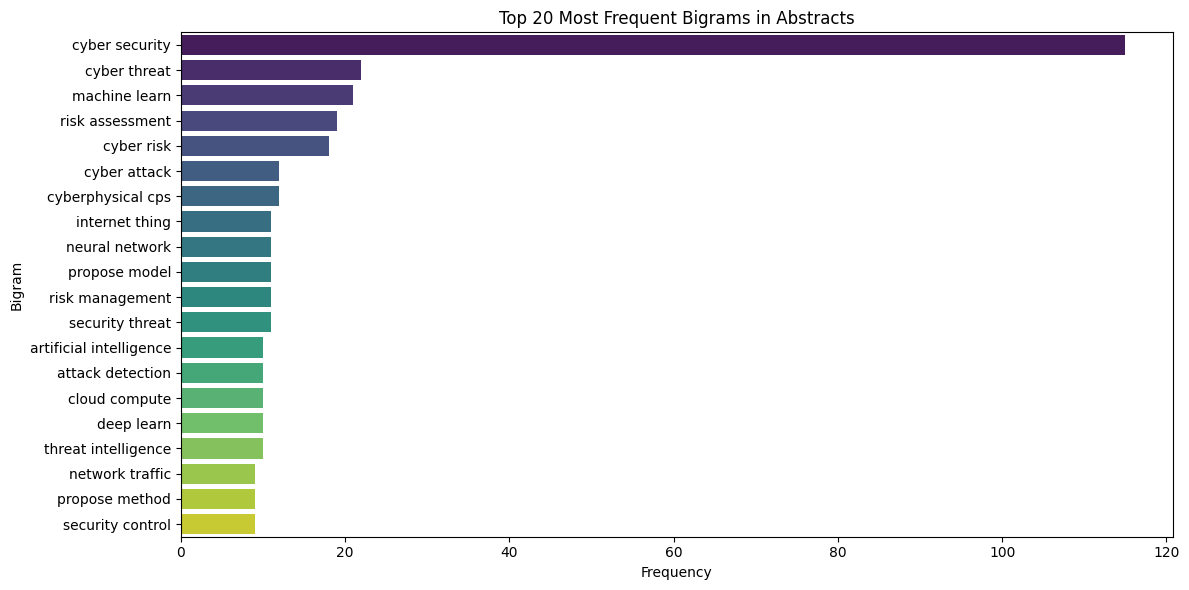

Rata-rata panjang kalimat di abstract setelah preprocessing adalah 127.08 kata.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Membaca file CSV
df = pd.read_csv('cybersecurity1_articles_springer_preprocessed.csv')  # Sesuaikan dengan nama file Anda
print(df.columns)

# Mengisi nilai kosong dan memastikan kolom "Preprocess Abstract" bertipe string
df['Preprocessed_Abstract'] = df['Preprocessed_Abstract'].fillna('').astype(str)

# Menggabungkan semua kata dalam kolom "Preprocess Abstract"
all_words = ' '.join(df['Preprocessed_Abstract'])

# Menghitung frekuensi kata
word_counts = Counter(all_words.split())
top_words_df = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

# Visualisasi Top 20 Kata
plt.figure(figsize=(12, 6))
sns.barplot(data=top_words_df, x='Frequency', y='Word', palette='viridis')
plt.title('Top 20 Most Frequent Words in Abstracts')
plt.tight_layout()
plt.show()

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Abstracts')
plt.show()

# Analisis Bigram
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform(df['Preprocessed_Abstract'])
bigram_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), bigrams.sum(axis=0).tolist()[0])))
top_bigrams_df = pd.DataFrame(bigram_counts.most_common(20), columns=['Bigram', 'Frequency'])

# Visualisasi Top 20 Bigram
plt.figure(figsize=(12, 6))
sns.barplot(data=top_bigrams_df, x='Frequency', y='Bigram', palette='viridis')
plt.title('Top 20 Most Frequent Bigrams in Abstracts')
plt.tight_layout()
plt.show()

# Analisis Panjang Rata-rata Kalimat
df['Word Count'] = df['Preprocessed_Abstract'].apply(lambda x: len(x.split()))
avg_word_count = df['Word Count'].mean()
print(f'Rata-rata panjang kalimat di abstract setelah preprocessing adalah {avg_word_count:.2f} kata.')


#FEATURE ENGINEERING TF-IDF


In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data
df = pd.read_csv('/content/cybersecurity1_articles_springer_preprocessed.csv')  # Sesuaikan dengan nama file Anda

# kolom "Preprocessed Abstract" bertipe string dan tidak ada nilai NaN
df['Preprocessed_Abstract'] = df['Preprocessed_Abstract'].fillna('').astype(str)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')  # max_features=100 untuk membatasi ke 100 kata teratas (bisa disesuaikan)

# Menghitung nilai TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Preprocessed_Abstract'])

# Mendapatkan kata-kata fitur TF-IDF
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Membuat DataFrame untuk nilai TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

# Gabungkan nilai TF-IDF dengan data asli
df_with_tfidf = pd.concat([df, tfidf_df], axis=1)

df_with_tfidf.to_csv('springer_cybersecurity_with_tfidf.csv', index=False, encoding='utf-8')
print("TF-IDF processing selesai! Data disimpan dalam 'springer_cybersecurity_with_tfidf.csv'.")

df = pd.read_csv('springer_cybersecurity_with_tfidf.csv')  # Sesuaikan dengan nama file Anda
print(df.head)


TF-IDF processing selesai! Data disimpan dalam 'springer_cybersecurity_with_tfidf.csv'.
<bound method NDFrame.head of                                                 Title  \
0   Perceptions and dilemmas around cyber-security...   
1   Maritime decision-makers and cyber security: d...   
2         Australia’s cyber security reform—an update   
3   A modular cyber security training programme fo...   
4   Proposing the future skill requirements for ma...   
..                                                ...   
95  Secure communication based on intelligent adap...   
96  An adaptive predefined time sliding mode contr...   
97  A survey on cyber threat intelligence sharing ...   
98  An integrated approach of designing functional...   
99  CyberDefender: an integrated intelligent defen...   

                                                  URL    Date Published  \
0   https://link.springer.com/article/10.1007/s102...     04 April 2024   
1   https://link.springer.com/article/10.1007/s